In [169]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [170]:
model = tf.keras.models.load_model('model.h5')

In [171]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_21 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 90, 90, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 90, 90, 16)        1168      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 45, 45, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 45, 45, 32)      

In [172]:
model.inputs

[<KerasTensor: shape=(None, 180, 180, 3) dtype=float32 (created by layer 'rescaling_21_input')>]

In [173]:
import cv2

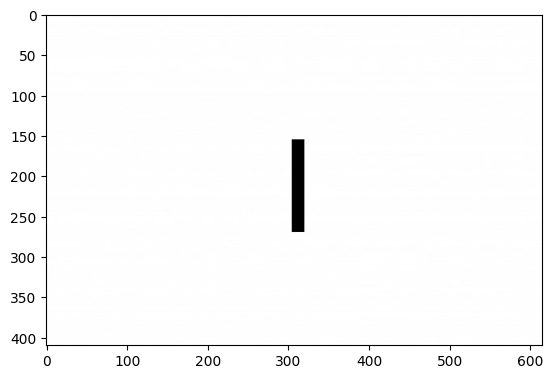

In [174]:
image = "i.jpeg"

img = cv2.imread(image)
plt.imshow(img)
img.resize(1,180,180,3)

# normalize
img = img.astype('float32')
img = img / 255.0

In [175]:
res = model.predict(img)

1/1 [==============================] - 0s 119ms/step


In [176]:
res

array([[ 31.093313,  38.59901 , -32.31736 ,  11.627439, -12.49523 ,
        -44.88051 ,  13.588877,   6.498577, -90.75751 ]], dtype=float32)

In [177]:
res


array([[ 31.093313,  38.59901 , -32.31736 ,  11.627439, -12.49523 ,
        -44.88051 ,  13.588877,   6.498577, -90.75751 ]], dtype=float32)

In [178]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
score = tf.nn.softmax(res[0])
print(score)
print(np.argmax(score))
print(class_names[np.argmax(score)])


tf.Tensor(
[5.4963998e-04 9.9945039e-01 1.5891837e-31 1.9326619e-12 6.4538099e-23
 5.5598765e-37 1.3740351e-11 1.1447763e-14 0.0000000e+00], shape=(9,), dtype=float32)
1
B


<BarContainer object of 9 artists>

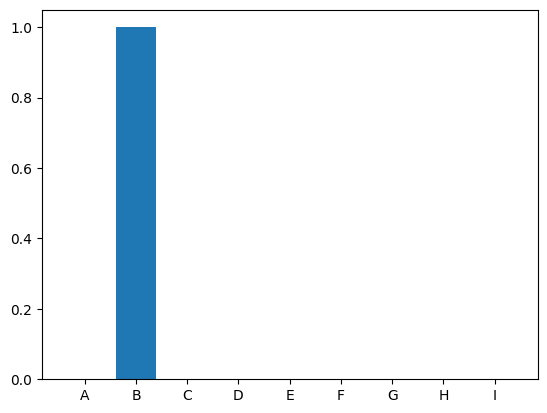

In [179]:
# bargraph score with class names
plt.bar(class_names, score)